# 연습문제

## 작업 준비

### 패키지 참조

In [1]:
import sys

sys.path.append("../../")
import helper

import numpy as np
from pandas import read_excel, concat
from matplotlib import pyplot as plt

### 그래프 한글 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

## 문제 1

아래의 데이터는 콩의 수분 함유량에 따른 강도를 조사한 데이터이다.

https://data.hossam.kr/E04/beans.xlsx

위의 데이터를 다항선형회귀모델을 적용하여 분석으로 설명력/에러율/결과표를 제시한 후, 수분함유량에 따른 강도의 산점도와 추세선을 시각화 하라.

표준화는 적용하지 않습니다.

### 1) 콩의 수분 함유량에 따른 강도 조사 데이터 분석

#### 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/E04/beans.xlsx")
origin.shape

(10, 2)

#### 회귀분석 수행

In [4]:
ols = helper.ml_ols(origin, xnames="수분함유량", yname="강도", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

계수:  [-8.95732508  0.12757362]
절편:  187.1535559018949
훈련데이터의 설명력:  0.94489794718447
R^2:  0.94489794718447
MAE:  0.7162543796946262
MSE:  0.6432321267445543
RMSE:  0.8020175351852067
MAPE:  2.293541595368633
MPE:  -0.06612752041159609
+----+------------+--------------+----------+------------+-----+----------+------------+---------+
|    | 종속변수   | 독립변수     |        B |   표준오차 |   β |        t |   유의확률 |     VIF |
|----+------------+--------------+----------+------------+-----+----------+------------+---------|
|  0 | 강도       | 수분함유량   | -8.95733 |    4.32966 |   0 | -2.06883 |  0.0773501 | 462.759 |
|  1 | 강도       | 수분함유량^2 | 0.127574 |  0.0613553 |   0 |  2.07926 |  0.0761682 | 100.839 |
+----+------------+--------------+----------+------------+-----+----------+------------+---------+


#### 시각화

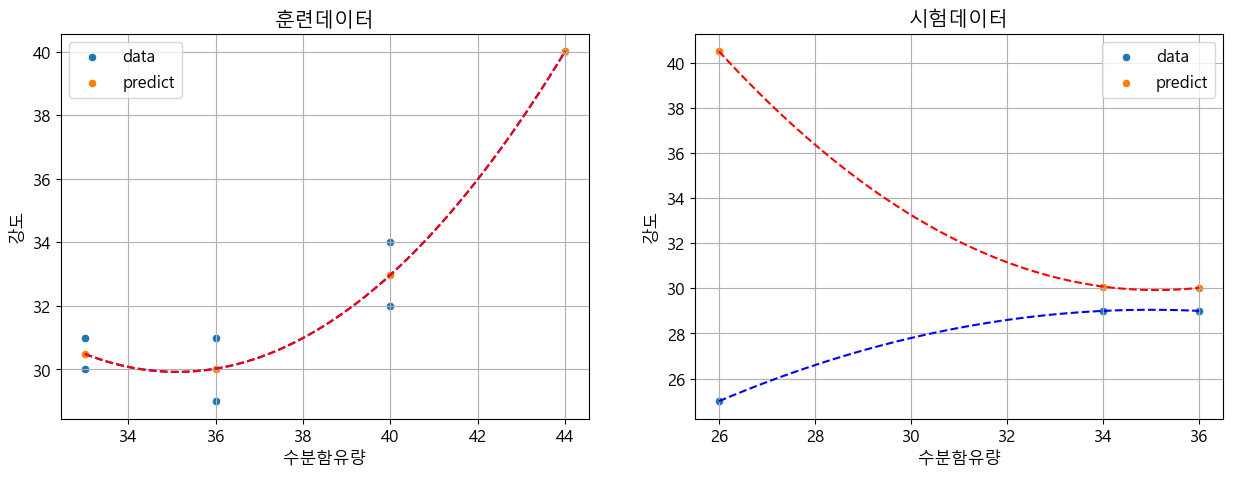

In [5]:
helper.regplot(ols.x_train['수분함유량'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['수분함유량'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

### 에어컨 예약대수에 따른 실 판매대수 분석

아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.

https://data.hossam.kr/E04/aircon.xlsx

#### 요구사항

1. 위 데이터를 분석하고 결과를 보고하시오.
2. 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.

#### 데이터 가져오기

In [6]:
origin = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
#origin = concat([origin, origin, origin, origin, origin])
#origin.reset_index(drop=True, inplace=True)
origin.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


#### 분석

계수:  [-0.55406606  0.02353277]
절편:  49.223681453537495
훈련데이터의 설명력:  0.8790272953308501
R^2:  0.8790272953308501
MAE:  4.931426347359585
MSE:  31.206020143225597
RMSE:  5.58623488077843
MAPE:  7.956937195376915
MPE:  -0.7604452522229356
+----+------------+------------+-----------+------------+-----+-----------+------------+---------+
|    | 종속변수   | 독립변수   |         B |   표준오차 |   β |         t |   유의확률 |     VIF |
|----+------------+------------+-----------+------------+-----+-----------+------------+---------|
|  0 | 판매대수   | 예약대수   | -0.554066 |    1.74783 |   0 | -0.317003 |   0.760487 | 146.194 |
|  1 | 판매대수   | 예약대수^2 | 0.0235328 |  0.0227504 |   0 |   1.03439 |    0.33536 | 19.0598 |
+----+------------+------------+-----------+------------+-----+-----------+------------+---------+


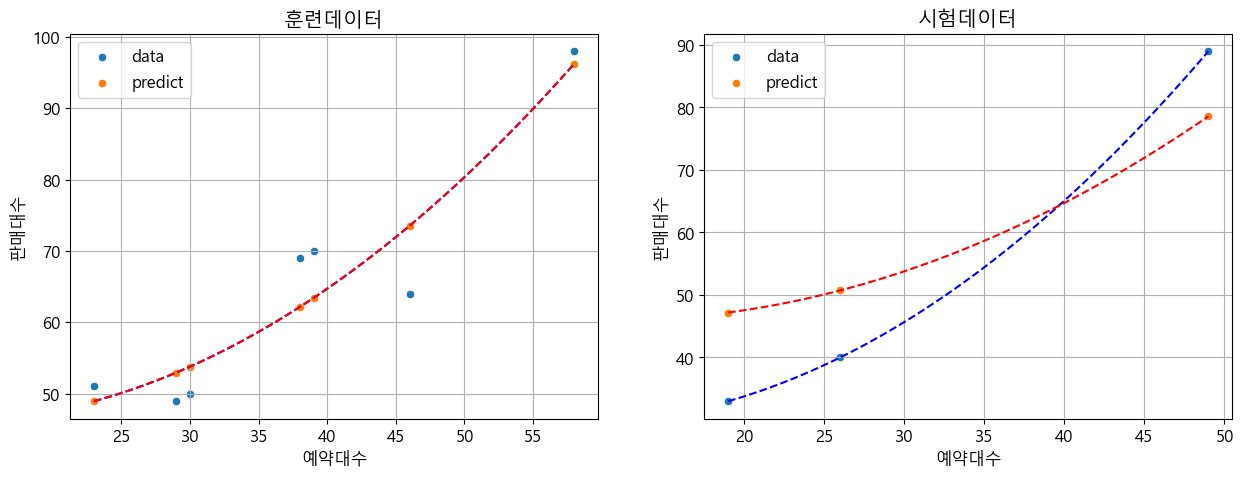

In [7]:
ols = helper.ml_ols(origin, xnames="예약대수", yname="판매대수", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

helper.regplot(ols.x_train['예약대수'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['예약대수'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

#### 예측

In [8]:
#result = ols.fit.predict([[150]])
result = ols.fit.predict([[150, 150**2]])
result

c:\Users\leekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([495.60104227])

In [9]:
"에어컨의 판매대수는 150대의 예약대수일 때 {0:0.1f}대 정도 판매될 것으로 예상됩니다.".format(result[0])

'에어컨의 판매대수는 150대의 예약대수일 때 495.6대 정도 판매될 것으로 예상됩니다.'

### 부모의 키에 따른 자식의 키 예측

아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.

https://data.hossam.kr/E04/galton.xlsx

#### 요구사항

1. 위 데이터를 분석하고 결과를 보고하시오.
2. 당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.

#### 데이터 가져오기

In [10]:
origin = read_excel("https://data.hossam.kr/E04/galton.xlsx")
origin

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


#### 분석

계수:  [-6.03493121  0.04880873]
절편:  252.40084334590293
훈련데이터의 설명력:  0.21339707956726817
R^2:  0.21339707956726817
MAE:  1.776372825429812
MSE:  4.960943625539211
RMSE:  2.2273175852444598
MAPE:  2.621174571683983
MPE:  -0.1080389649267255
+----+------------+------------+-----------+------------+-----+----------+------------+---------+
|    | 종속변수   | 독립변수   |         B |   표준오차 |   β |        t |   유의확률 |     VIF |
|----+------------+------------+-----------+------------+-----+----------+------------+---------|
|  0 | child      | parent     |  -6.03493 |    2.19015 |   0 | -2.75549 | 0.00597567 | 3169.65 |
|  1 | child      | parent^2   | 0.0488087 |  0.0160359 |   0 |  3.04371 | 0.00240289 | 1580.59 |
+----+------------+------------+-----------+------------+-----+----------+------------+---------+


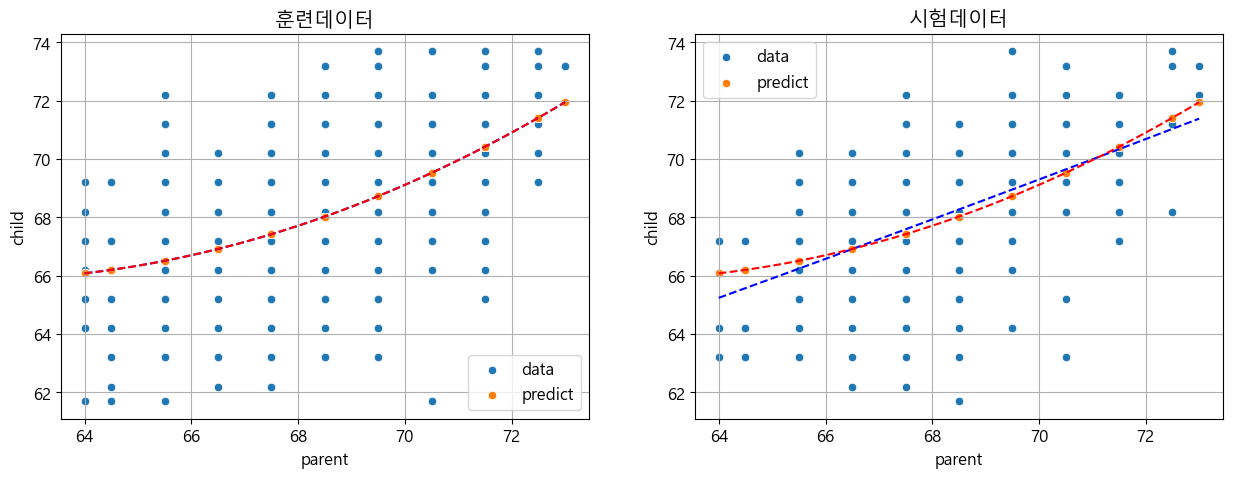

In [11]:
ols = helper.ml_ols(origin, xnames="parent", yname="child", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

helper.regplot(ols.x_train['parent'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['parent'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

#### 예측

In [12]:
result = ols.fit.predict([[68.9, 68.9**2]])
result

c:\Users\leekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.2993884])

In [13]:
" 부모의 키가 68.9인 경우 내 자녀의 키는 {0:0.1f}inch 정도일 것으로 예상됩니다.".format(result[0])

' 부모의 키가 68.9인 경우 내 자녀의 키는 68.3inch 정도일 것으로 예상됩니다.'

## 문제2

### 당뇨병 발병 예측 모델

다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.

> https://data.hossam.kr/E04/diabetes.xlsx

| 변수 | 설명 |
|---|---|
| age | 나이 |
| sex | 성별 |
| bmi | bmi지수(비만도) |
| bp | 평균 혈압 |
| s1~s6 | 6종류의 혈액검사 수치 |
| target | 당뇨병 진행률(종속변수) |

주어진 데이터는 표준화가 적용되어 있다.

이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

#### 데이터 가져오기

In [14]:
origin = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
origin.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [15]:
origin['sex'].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

In [16]:
origin['sex'] = np.where(origin['sex'] < 0, 0, 1)
origin['sex'].value_counts()

sex
0    235
1    207
Name: count, dtype: int64

계수:  [ -14.7440463   589.39814506  284.04579693 -223.59685911  682.54074341]
절편:  154.9771434955162
훈련데이터의 설명력:  0.4935365620379498
검증데이터의 설명력:  0.48997951425439557
R^2:  0.4935365620379498
MAE:  43.8940428836076
MSE:  2912.1449194512898
RMSE:  53.964293004275426
MAPE:  39.69503541035235
MPE:  -18.230642021092834
+----+------------+------------+----------+------------+-----+----------+-------------+---------+
|    | 종속변수   | 독립변수   |        B |   표준오차 |   β |        t |    유의확률 |     VIF |
|----+------------+------------+----------+------------+-----+----------+-------------+---------|
|  0 | target     | sex        |  -14.744 |    5.42482 |   0 | -2.71789 |   0.0068319 | 1.73032 |
|  1 | target     | bmi        |  589.398 |    63.8091 |   0 |  9.23689 |           0 | 1.41498 |
|  2 | target     | bp         |  284.046 |    63.4803 |   0 |  4.47455 |  9.7838e-06 | 1.32576 |
|  3 | target     | s1         | -223.597 |    64.3903 |   0 | -3.47253 | 0.000567064 | 1.31928 |
|  4 | target  

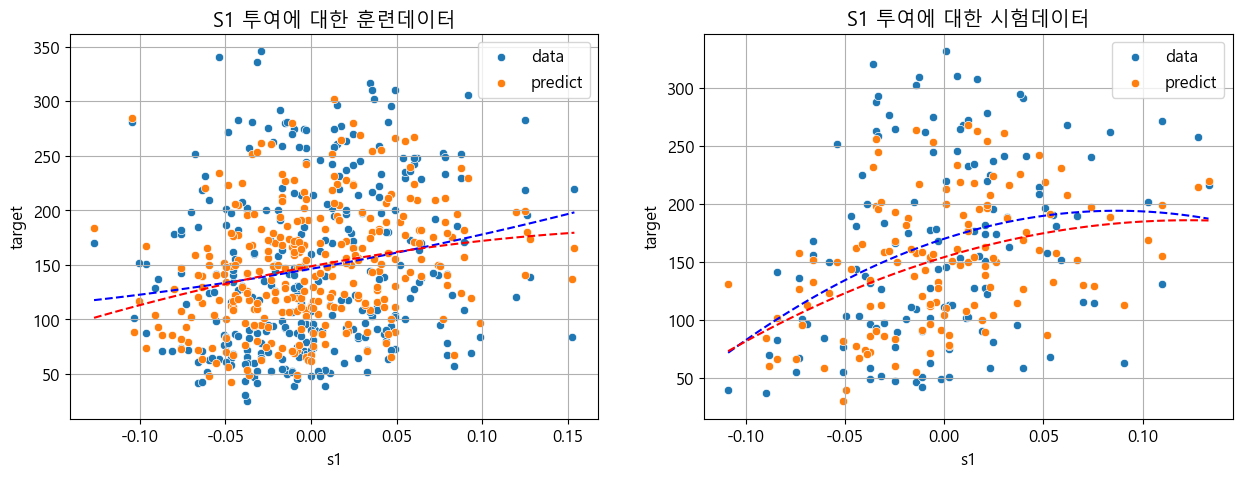

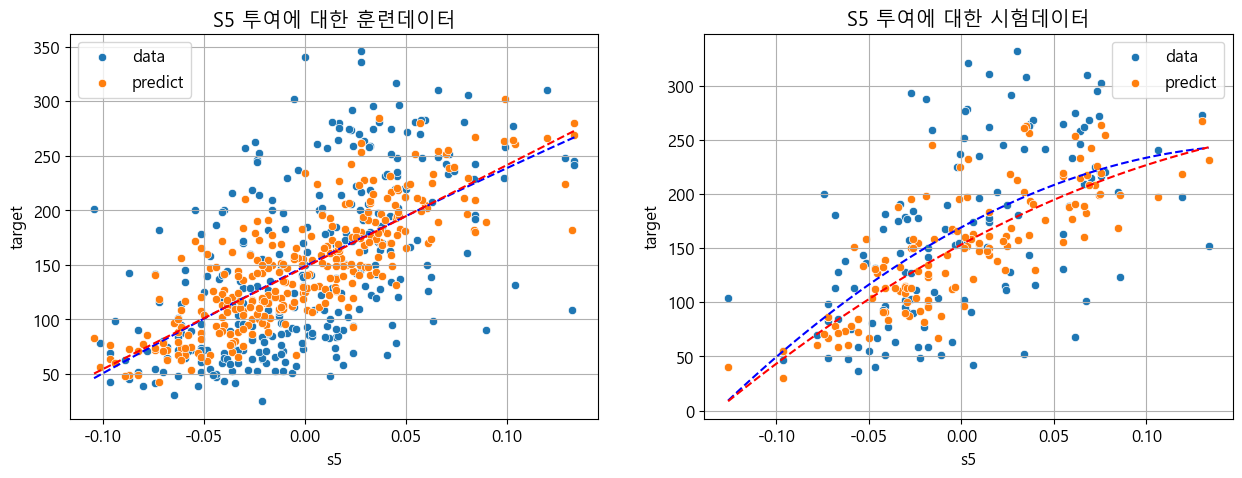

In [17]:
xnames = "sex,bmi,bp,s1,s5"
ols = helper.ml_ols(origin, xnames=xnames, yname="target", degree=1, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)
print("검증데이터의 설명력: ", ols.testRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

helper.regplot(ols.x_train['s1'], ols.y_train, ols.train_pred, "S1 투여에 대한 훈련데이터",
               ols.x_test['s1'], ols.y_test, ols.test_pred, "S1 투여에 대한 시험데이터",
               figsize=(15, 5))


helper.regplot(ols.x_train['s5'], ols.y_train, ols.train_pred, "S5 투여에 대한 훈련데이터",
               ols.x_test['s5'], ols.y_test, ols.test_pred, "S5 투여에 대한 시험데이터",
               figsize=(15, 5))

### 뉴욕 멘하튼 주택 임대료 예측 모델

다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 `rent`이다. 분석하라

> https://data.hossam.kr/E04/manhattan.xlsx

#### 데이터 가져오기

In [18]:
origin = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
origin.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### 데이터 전처리

#### 명목형 변수 확인

In [19]:
origin['neighborhood'].value_counts()

neighborhood
Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: count, dtype: int64

> 값의 종류가 지나치게 많으므로 이 변수는 제외하기로 함

In [20]:
origin['borough'].value_counts()

borough
Manhattan    3539
Name: count, dtype: int64

> 값의 종류가 없으므로 이 변수도 제외하기로 함

#### 불필요한 변수를 제거

In [21]:
df = origin.drop(['neighborhood', 'borough'], axis=1)
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


#### 분석 모델 적용

In [31]:
xnames = list(df.columns)
xnames.remove('rent')
xnames.remove('has_elevator')
xnames.remove('has_roofdeck')
xnames.remove('has_washer_dryer')
xnames.remove('has_dishwasher')
xnames.remove('has_gym')
print(xnames)

['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_doorman', 'has_patio']


In [34]:
ols = helper.ml_ols(df, xnames=xnames, yname="rent", degree=1, test_size=0.3, use_scalling=True)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)
print("검증데이터의 설명력: ", ols.testRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

계수:  [-0.09371914  0.20074505  0.74553076 -0.02729223  0.08347553 -0.10219161
 -0.02577317 -0.01124037 -0.0225104 ]
절편:  -0.01123480712619912
훈련데이터의 설명력:  0.7817727235086297
검증데이터의 설명력:  0.7698041157370112
R^2:  0.7817727235086297
MAE:  0.2933104508452643
MSE:  0.21453639177587452
RMSE:  0.46318073338155435
MAPE:  136.6873926687801
MPE:  -7.693555649056175
+----+------------+------------------+------------+------------+-----+----------+-------------+---------+
|    | 종속변수   | 독립변수         |          B |   표준오차 |   β |        t |    유의확률 |     VIF |
|----+------------+------------------+------------+------------+-----+----------+-------------+---------|
|  0 | rent       | bedrooms         | -0.0937191 |  0.0130507 |   0 | -7.18117 | 8.38885e-13 | 2.85849 |
|  1 | rent       | bathrooms        |   0.200745 |  0.0141451 |   0 |  14.1918 |           0 | 3.44667 |
|  2 | rent       | size_sqft        |   0.745531 |  0.0153096 |   0 |  48.6971 |           0 | 6.47567 |
|  3 | rent       | m

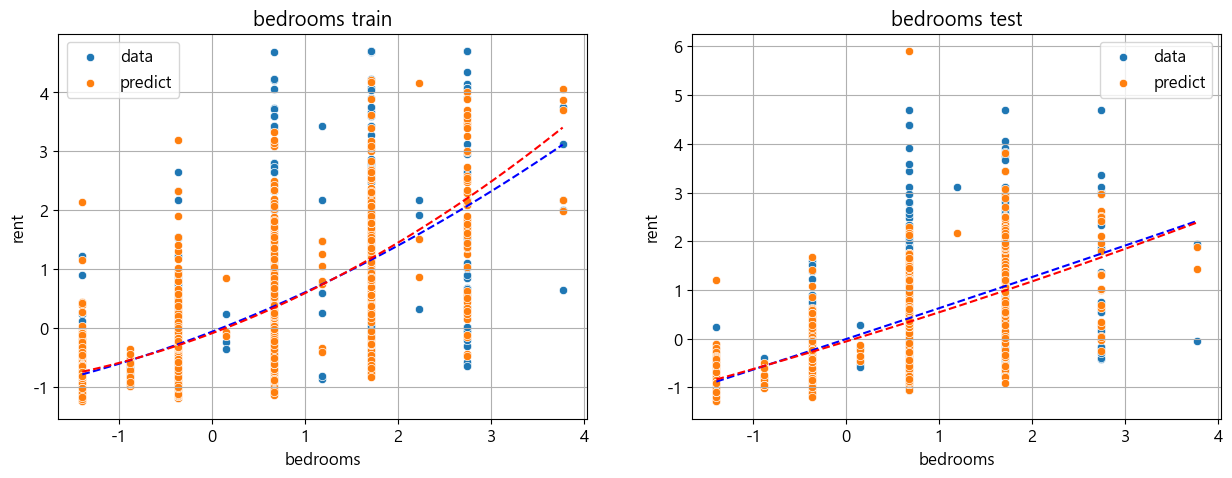

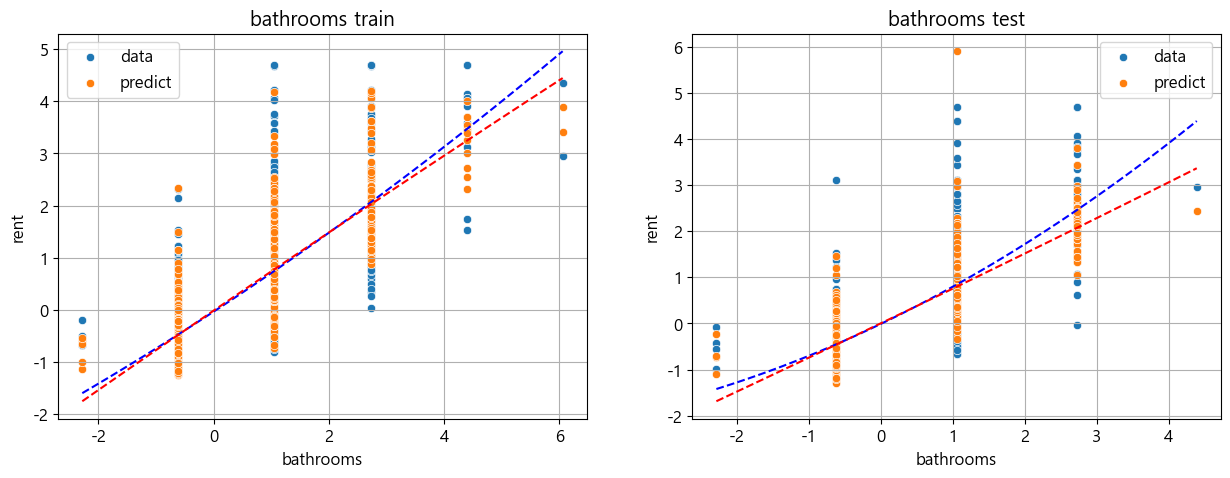

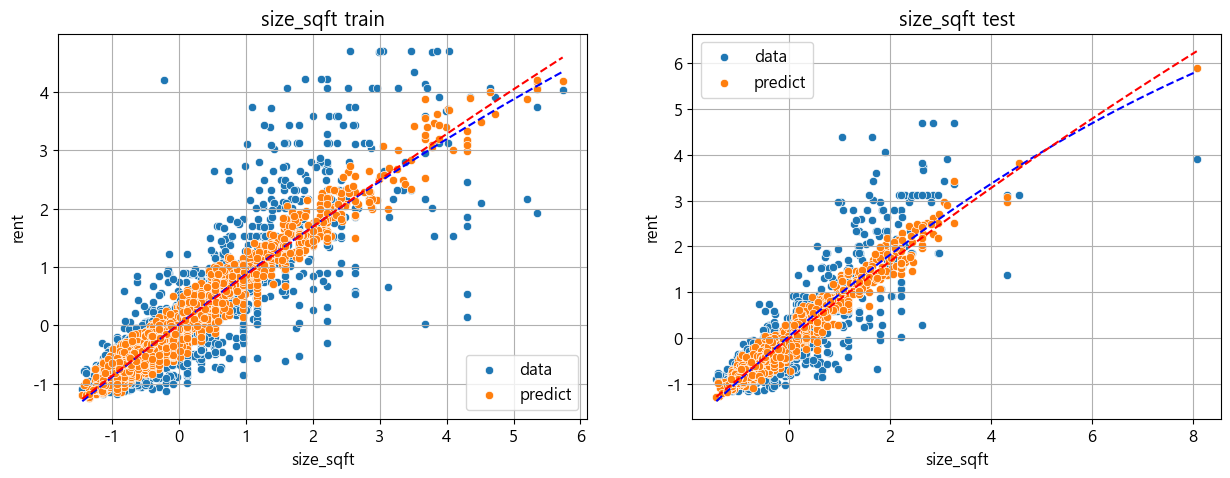

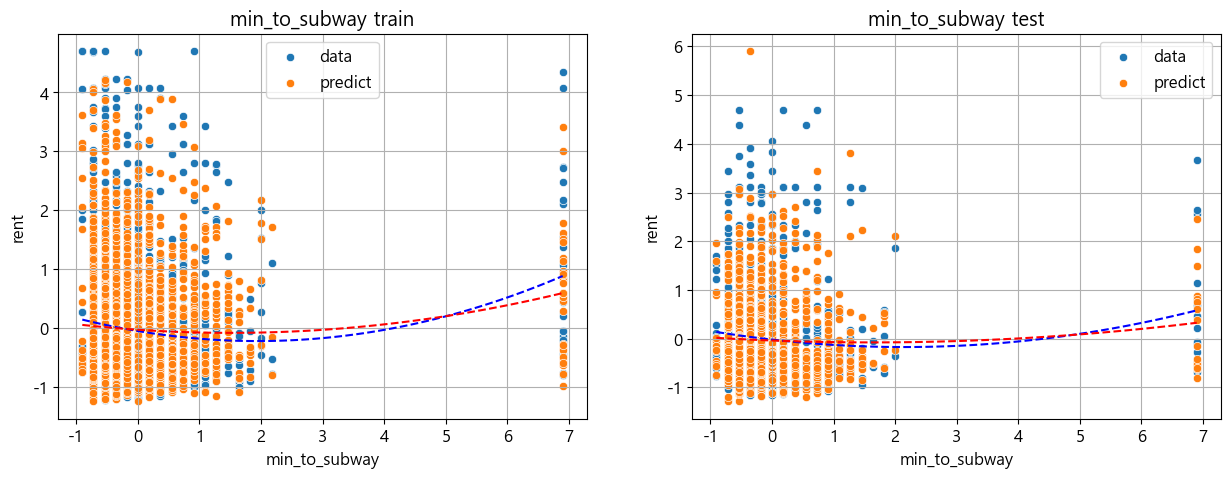

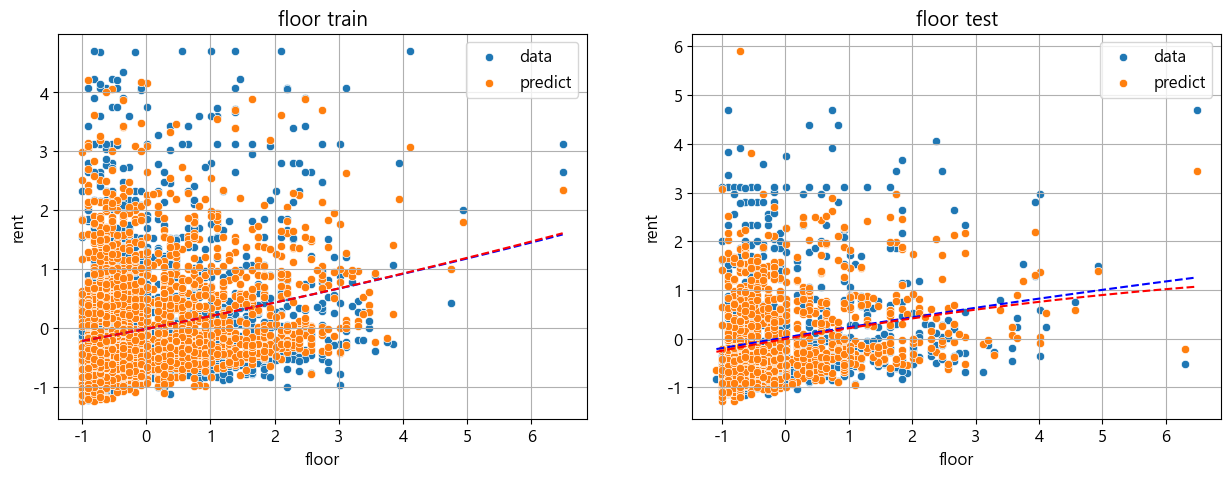

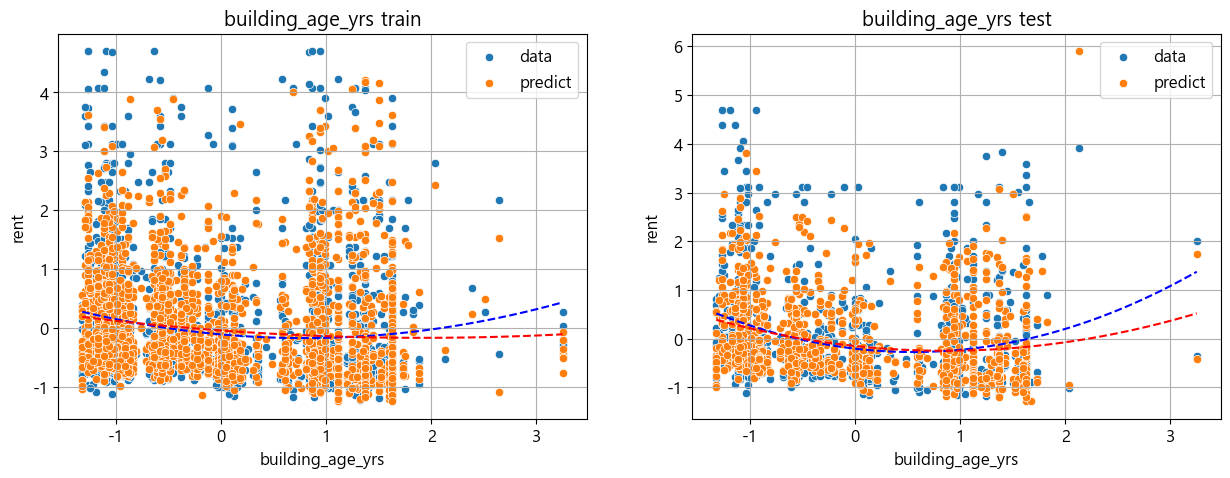

c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1206: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1213: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1228: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1235: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)


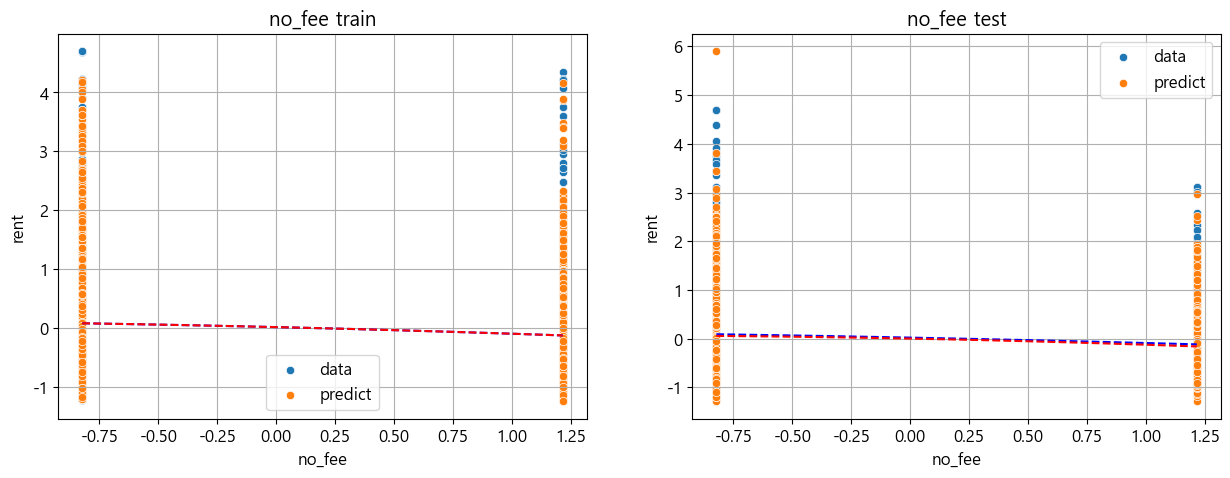

c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1206: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1213: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1228: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1235: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)


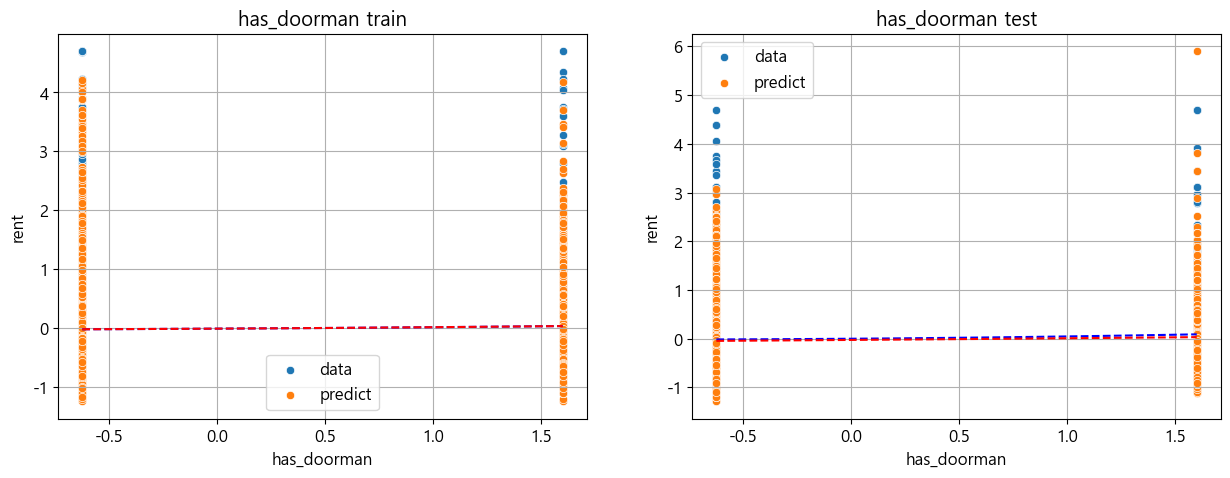

c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1206: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1213: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1228: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
c:\Users\leekh\MegaitDataAnalysis\F. 데이터 마이닝\02.Sklearn\../..\helper.py:1235: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)


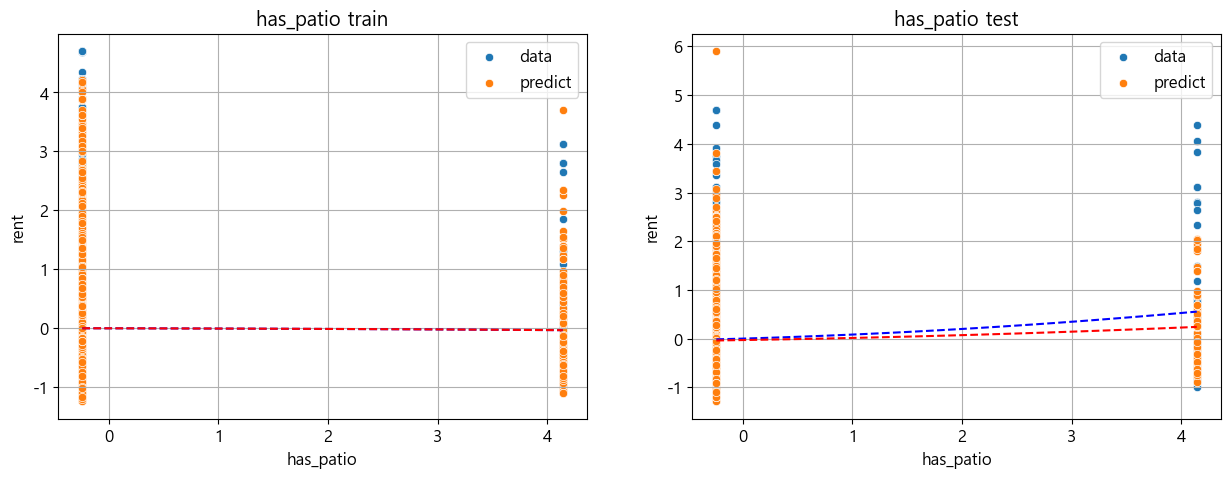

In [38]:
for x in xnames:
    helper.regplot(ols.x_train[x], ols.y_train, ols.train_pred, "%s train" % x,
               ols.x_test[x], ols.y_test, ols.test_pred, "%s test" % x,
               figsize=(15, 5), save_path="manhattan_%s.png" % x)